# 볼린저 밴드
1. 파일 로드
2. 결측치와 이상치를 제거
3. 시간, 종가만의 데이터프레임을 생성
4. 이동 평균선 : 데이터 20개의 평균을 구해서 새로운 파생변수 대입
5. 상단 밴드 : 이동 평균선 + (2 * 데이터 20개의 표준편차)
6. 하단 밴드 : 이동 평균선 - (2 * 데이터 20개의 표준편차)
7. 구매 상태를 확인하는 파생변수 생성
8. 구매 상태 입력
9. 수익률 계산 (수익률, 누적수익률)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../csv/GM.csv",  index_col = 'Date')
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-11-18,35.000000,35.990002,33.889999,34.189999,27.027195,457044300
2010-11-19,34.150002,34.500000,33.110001,34.259998,27.082527,107842000
2010-11-22,34.200001,34.480000,33.810001,34.080002,26.940243,36650600
2010-11-23,33.950001,33.990002,33.189999,33.250000,26.284130,31170200
2010-11-24,33.730000,33.799999,33.220001,33.480000,26.465942,26138000


In [5]:
df = df.loc[~df.isin((np.nan, np.inf, -np.inf)).any(1)]
df

C:\Users\shoni\AppData\Local\Temp\ipykernel_7528\2364376469.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  df = df.loc[~df.isin((np.nan, np.inf, -np.inf)).any(1)]


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-11-18,35.000000,35.990002,33.889999,34.189999,27.027195,457044300
2010-11-19,34.150002,34.500000,33.110001,34.259998,27.082527,107842000
2010-11-22,34.200001,34.480000,33.810001,34.080002,26.940243,36650600
2010-11-23,33.950001,33.990002,33.189999,33.250000,26.284130,31170200
2010-11-24,33.730000,33.799999,33.220001,33.480000,26.465942,26138000
...,...,...,...,...,...,...
2019-06-18,36.380001,36.779999,36.139999,36.700001,36.700001,8226900
2019-06-19,37.000000,37.470001,36.750000,36.779999,36.779999,10884800
2019-06-20,37.150002,37.310001,36.490002,36.959999,36.959999,8639700


In [7]:
# 시간과 종가만의 데이터프레임 생성
price_df = df[['Adj Close']]
price_df.head(1)

,Adj Close
Date,
2010-11-18,27.027195


In [9]:
# 0번째 위치부터 20번 위치를 출력 , 평균
price_df.iloc[[20]]['center'] = price_df.iloc[0:20].mean().value[0]

Adj Close    26.922061
dtype: float64

In [11]:
# 이동 평균선 : 종가 데이터 20개의 평균값

price_df['center'] = price_df['Adj Close'].rolling(20).mean()

C:\Users\shoni\AppData\Local\Temp\ipykernel_7528\1505368726.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_df['center'] = price_df['Adj Close'].rolling(20).mean()


In [16]:
# ub, lb 두 개의 파생변수 생성

# 상단밴드 생성
price_df['ub'] = price_df['center'] + (2 * price_df['Adj Close'].rolling(20).std())

# 하단밴드 생성
price_df['lb'] = price_df['center'] - (2 * price_df['Adj Close'].rolling(20).std())


C:\Users\shoni\AppData\Local\Temp\ipykernel_7528\3657241582.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_df['ub'] = price_df['center'] + (2 * price_df['Adj Close'].rolling(20).std())
C:\Users\shoni\AppData\Local\Temp\ipykernel_7528\3657241582.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_df['lb'] = price_df['center'] - (2 * price_df['Adj Close'].rolling(20).std())


In [18]:
price_df.tail()

,Adj Close,center,ub,lb
Date,,,,
2019-06-18,36.700001,35.249369,37.239697,33.259041
2019-06-19,36.779999,35.251553,37.248834,33.254271
2019-06-20,36.959999,35.340899,37.478352,33.203445
2019-06-21,36.919998,35.449022,37.678999,33.219046
2019-06-24,36.814999,35.552390,37.836478,33.268302


In [ ]:
# 주식 구매 후 ub 초과 시 판매 or lb 미만 시 재구입 이런 방식의 투자

In [22]:
test_df = price_df.tail(100)

<Axes: xlabel='Date'>

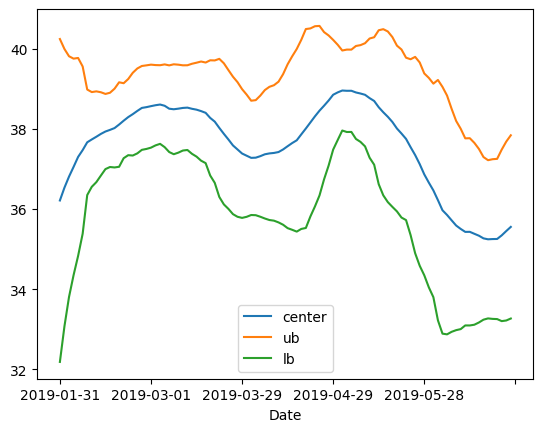

In [23]:
test_df.drop('Adj Close', axis = 1).plot()

In [26]:
start = "2011-01-02"
price_df2 = price_df.loc[start:]
price_df2.head(2)

,Adj Close,center,ub,lb
Date,,,,
2011-01-03,29.295927,27.433909,29.236157,25.631661
2011-01-04,29.959959,27.569085,29.692262,25.445907


In [28]:
# 거래 내역이라는 파생변수
price_df2['trade'] = ""
price_df2.head(2)

C:\Users\shoni\AppData\Local\Temp\ipykernel_7528\769398054.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_df2['trade'] = ""


,Adj Close,center,ub,lb,trade
Date,,,,,
2011-01-03,29.295927,27.433909,29.236157,25.631661,
2011-01-04,29.959959,27.569085,29.692262,25.445907,


### 구매 내역 추가
- 조건
    1. 상단 밴드보다 종가가 높은 경우
        - 현재 구매 상태이면
            - 매도. trade = ""
        - 구매 상태가 아니면
            - 아무 행동도 하지 않는다. trade = ""

    2. 하단 밴드보다 종가가 낮은 경우
        - 현재 구매 상태이면
            - 아무 행동도 하지 않는다. trade = 'buy'
        - 구매 상태가 아니면
            - 매수. trade = 'buy'

    3. 하단 밴드와 상단 밴드 사이에 종가가 존재하는 경우
        - 현재 구매 상태이면
            - 아무 행동도 하지 않는다. trade = 'buy'
        - 구매 상태가 아니면
            - 아무 행동도 하지 않는다. trade = ""

In [33]:
for i in price_df2.index :
    # 상단 밴드보다 종가가 높은 경우
    if price_df2.loc[i, 'Adj Close'] > price_df2.loc[i, 'ub'] :
        # 현재 구매 상태이면
        if price_df2.shift(1).loc[i, 'trade'] == 'buy' :
            # 매도
            price_df2.loc[i, 'trade'] = ''
        else :
            price_df2.loc[i, 'trade'] = ''

    # 하단 밴드보다 종가가 낮은 경우
    elif price_df2.loc[i, 'Adj Close'] < price_df2.loc[i, 'lb'] :
        # 현재 구매 상태이면
        if price_df2.shift(1).loc[i, 'trade'] == 'buy' :
            # 구매 상태를 유지
            price_df2.loc[i, 'trade'] = 'buy'
        else :
            price_df2.loc[i, 'trade'] = 'buy'

    else :
        # 현재 구매 상태이면
        if price_df2.shift(1).loc[i, 'trade'] == 'buy' :
            # 구매 상태를 유지
            price_df2.loc[i, 'trade'] = 'buy'
        else :
            price_df2.loc[i, 'trade'] = ''

C:\Users\shoni\AppData\Local\Temp\ipykernel_7528\3291406338.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_df2.loc[i, 'trande'] = ''


In [34]:
price_df2['trade'].value_counts()

buy    1130
       1002
Name: trade, dtype: int64

###  수익률 계산
1. 구매한 날의 종가
    - 전날 trade 항목의 값이 '' 이고 현재의 trade가 'buy'인 날의 종가
2. 판매한 날의 종가
    - 전날 trade 항목의 값이 'buy' 이고 현재의 trade가 ''인 날의 종가
3. 수익률 계산
    - (판매가격 - 구매가격) / 구매가격 + 1

4. 구매 가격과 판매 가격을 초기화
5. 여러 개의 수익률 발생
6. 여러 개의 수익률로 누적 수익률 계산

In [37]:
rtn = 1.0
price_df2['return'] = 1
buy = 0.0
sell = 0.0

for i in price_df2.index :
    # 구매가를 출력
    if (price_df2.shift(1).loc[i, 'trade'] == '') and (price_df2.loc[i, 'trade'] == 'buy') :
        buy = price_df2.loc[i, 'Adj Close']
        print('진입일 :', i, '구매 가격 :', buy)
    # 판매가를 출력
    elif (price_df2.shift(1).loc[i, 'trade'] == 'buy') and (price_df2.loc[i, 'trade'] == '') :
        sell = price_df2.loc[i, 'Adj Close']
        rtn = (sell - buy) / buy + 1
        price_df2.loc[i, 'return'] = rtn
        print('판매일 :', i, '판매 가격 :', sell, '수익률 :', rtn)


    # 구매가와 판매가를 초기화 (판매가 되고 나서)
    if price_df2.loc[i, 'trade'] == '' :
        buy = 0.0
        sell = 0.0

C:\Users\shoni\AppData\Local\Temp\ipykernel_7528\2396939451.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_df2['return'] = 1


진입일 : 2011-02-02 구매 가격 : 28.205038
판매일 : 2011-04-05 판매 가격 : 25.983728 수익률 : 0.9212442117610337
진입일 : 2011-06-02 구매 가격 : 23.398802
판매일 : 2011-07-07 판매 가격 : 25.137901 수익률 : 1.0743242752342619
진입일 : 2011-07-27 구매 가격 : 22.244669
판매일 : 2012-01-05 판매 가격 : 17.525387 수익률 : 0.7878466072028314
진입일 : 2012-03-06 구매 가격 : 19.43049
판매일 : 2012-04-02 판매 가격 : 21.15378 수익률 : 1.0886899918633035
진입일 : 2012-04-09 구매 가격 : 19.1301
판매일 : 2012-08-07 판매 가격 : 16.142014 수익률 : 0.8438018619871303
진입일 : 2013-02-20 구매 가격 : 21.42255
판매일 : 2013-03-20 판매 가격 : 23.082602 수익률 : 1.0774908682673165
진입일 : 2013-06-20 구매 가격 : 25.738686
판매일 : 2013-09-10 판매 가격 : 29.248499 수익률 : 1.1363633326114626
진입일 : 2013-10-03 구매 가격 : 27.896749
판매일 : 2013-10-30 판매 가격 : 29.430317 수익률 : 1.0549730006173836
진입일 : 2014-01-16 구매 가격 : 30.8295
판매일 : 2014-03-05 판매 가격 : 29.659563 수익률 : 0.9620513793606772
진입일 : 2014-03-13 구매 가격 : 26.948151
판매일 : 2014-06-04 판매 가격 : 29.125372 수익률 : 1.080792964237138
진입일 : 2014-07-24 구매 가격 : 28.74103
판매일 : 2014-11-17 판매 가격 :

In [39]:
# 누적 수익률
acc_rtn = 1.0

for i in price_df2.index :
    rtn = price_df2.loc[i, 'return']
    acc_rtn *= rtn
    price_df2.loc[i, 'acc_rtn'] = acc_rtn

print('누적 수익률 :', acc_rtn)

누적 수익률 : 1.1764314536564138


C:\Users\shoni\AppData\Local\Temp\ipykernel_7528\699351076.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  price_df2.loc[i, 'acc_rtn'] = acc_rtn
C:\Users\shoni\AppData\Local\Temp\ipykernel_7528\699351076.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_df2.loc[i, 'acc_rtn'] = acc_rtn


In [ ]:
# 위에 수익률 구할 때는, 팔 때만 골라서 수익률을 구하기 때문에, 값이 없으면 값이 빈칸으로 나오므로 초기값을 정해줬다
# rice_df2['return'] = 1

# 누적 수익률을 구할 때는 모든 과정을 다 계산하므로, 컬럼에 초기값을 정해주지 않았다.